In [50]:
from pytrends.request import TrendReq
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from pprint import pprint
import os
import GetOldTweets3 as got
from datetime import timedelta, date, datetime
from tqdm import tqdm
import numpy as np

In [17]:
# keywords = ['health', 'trump', 'guns', 'school', 'virus']

# time_interval = 1 #anos
def plot_trend(keywords, start_date, end_date, geo='US', lang='en-US'):
    # start_date = (datetime.datetime.now() - relativedelta(years=time_interval))
    # end_date = datetime.datetime.now()
    start_date = datetime.fromisoformat(start_date)
    end_date = datetime.fromisoformat(end_date)
    # Only need to run this once, the rest of requests will use the same session.
    pytrend = TrendReq(hl='en-US')
    # Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
    pytrend.build_payload(kw_list=keywords, timeframe='today 5-y',  gprop='',geo='US')

    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df.loc[start_date:end_date].plot(figsize=(9,6))

#print suggestions
def get_suggestions(w):
    return [x['title'] for x in pytrend.suggestions(keyword=w)]

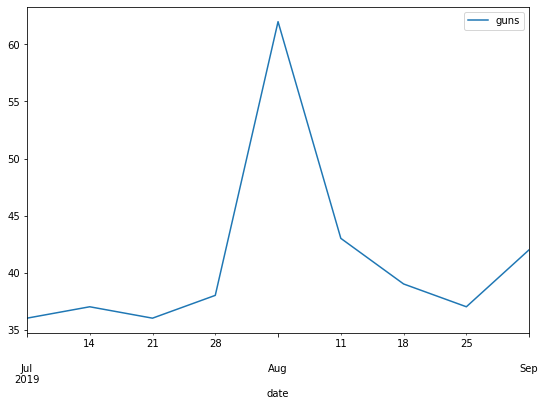

In [28]:
plot_trend(['guns'], '2019-07-01', '2019-09-01')

In [68]:
df = pd.read_pickle('data/tweets_guns_20198.csv')
df

,anger,anger_pred,date,disgust,disgust_pred,favorites,fear,fear_pred,id,joy,joy_pred,replies,retweets,sadness,sadness_pred,surprise,surprise_pred,text
0,0,8.993805e-17,2019-08-01 23:57:08+00:00,0,4.479700e-25,44,0,2.792132e-03,1157077837561696256,1,8.471662e-01,0,11,0,1.342347e-12,0,1.939440e-11,I send my support to the champions fighting fo...
1,0,4.845235e-14,2019-08-01 23:53:54+00:00,0,4.052314e-15,38,0,1.061505e-10,1157077024713912331,1,7.889280e-01,0,10,0,8.072332e-14,0,1.823047e-08,#GSU2019 Goals: meeting one of our favorite gu...
2,1,9.789656e-01,2019-08-01 23:51:42+00:00,0,1.198319e-06,64,0,2.315389e-04,1157076469677297666,0,5.258178e-07,1,2,0,4.959332e-18,0,5.856114e-12,A joke bout us playing wit gun or eating chick...
3,0,9.194760e-11,2019-08-01 23:50:09+00:00,0,1.363906e-15,631,0,3.558119e-07,1157076079858847744,0,2.531010e-03,88,326,0,1.130187e-11,0,1.091137e-10,"Retweet this, tag your favorite Presidential c..."
4,0,2.012479e-04,2019-08-01 23:48:15+00:00,0,1.089528e-20,58,0,2.854648e-03,1157075603172024321,0,1.163089e-02,1,4,0,4.854587e-14,1,9.965028e-01,"Late night, schemin’ over linguini and guns/at..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26986,0,1.115725e-16,2019-08-31 00:00:01+00:00,0,1.810912e-10,1,1,6.864414e-01,1167587812859940867,0,1.697147e-06,0,0,1,8.930759e-01,0,1.276683e-17,They will never get out guns without resistanc...
26987,0,3.769439e-03,2019-08-31 00:00:01+00:00,1,7.712792e-01,5,0,5.819483e-15,1167587809160552450,0,8.929390e-06,1,1,1,1.089730e-01,0,1.153486e-13,Police say a student was found at an Ohio high...
26988,0,2.786598e-05,2019-08-31 00:00:01+00:00,1,9.960191e-01,0,0,2.791086e-02,1167587808845991942,0,2.593287e-03,1,1,1,3.419007e-01,1,7.332968e-01,BYE BYE CRASH AND BURN: NASCAR Rejects Ads For...
26989,0,1.013105e-06,2019-08-31 00:00:00+00:00,0,4.318209e-23,0,0,7.275344e-08,1167587807402967040,0,3.465914e-07,0,0,0,5.301600e-08,0,4.171497e-17,A Georgia probation officer has resigned and h...


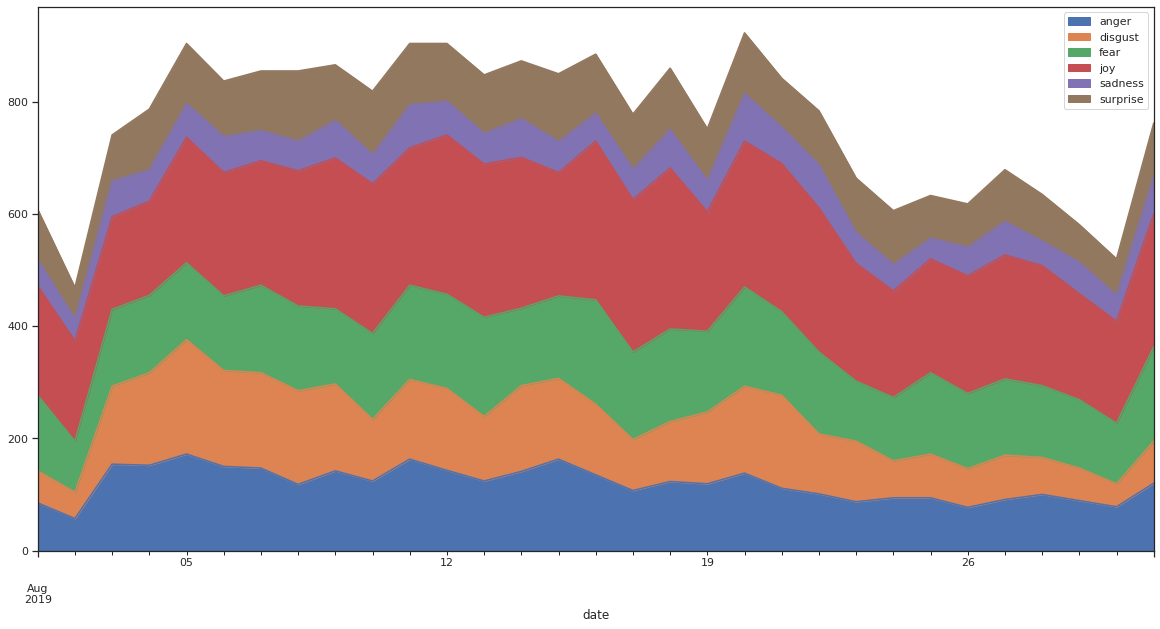

In [80]:
df['date'] = pd.to_datetime(df['date']).dt.normalize()
result = df.set_index('date')[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']].resample("D").sum()

plot = result.plot.area(figsize=(20,10))

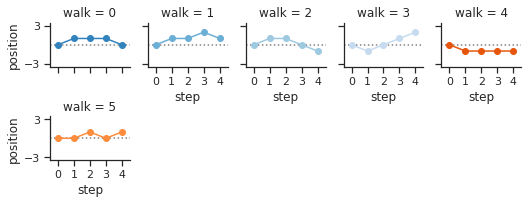

In [94]:

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (6, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 6)
walk = np.repeat(range(6), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=5, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [60]:
df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,0,19
96,-1,1,19
97,0,2,19
98,1,3,19
